# Correlation among multiple categorical variables (Pandas)

https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import chisquare
import seaborn as sns



In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/mushrooms.csv")
df.tail(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,o,c,l,e


In [3]:
print(len(df.columns))

23


In [4]:
df=df.apply(lambda x : pd.factorize(x)[0])+1

dfCorr = pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])
dfCorr

/Users/mcorbett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:5048: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:5048: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000000,21232.416667,21760.412698,21971.0,12903.933333,41276.0,37950.0,24384.0,18400.015152,22568.0,...,25984.828571,27003.828571,42296.0,41198.500000,39260.0,22593.8,14473.990476,12463.600000,11895.247619,28960.0
1,11648.666667,0.000000,10257.117460,6824.0,14322.447619,12638.0,10540.0,3978.0,21205.303896,7088.0,...,9318.584127,9002.228571,12560.0,12736.000000,12026.0,7744.8,12577.390476,10384.666667,10883.447619,6168.0
2,31764.700000,28630.333333,0.000000,36714.0,10718.114286,60129.0,54196.0,31714.0,17550.122078,34424.0,...,39655.484127,39869.752381,60336.0,60512.000000,54016.0,35984.8,19801.390476,14714.666667,13476.409524,39024.0
3,8693.633333,4178.333333,10593.555556,0.0,16449.676190,4538.0,3592.0,3660.0,22749.672727,3308.0,...,6340.869841,6211.314286,4748.0,4588.000000,4568.0,1424.8,8851.961905,12224.666667,12265.733333,4668.0
4,55589.933333,62703.333333,46047.917460,56298.0,0.000000,122321.0,114688.0,80138.0,9121.835498,65360.0,...,65757.579365,72322.857143,124376.0,122800.000000,118304.0,57395.2,21044.647619,15777.066667,11209.952381,98720.0
5,9913.833333,4907.333333,13046.755556,2269.0,22859.619048,0.0,866.0,2701.0,28525.212987,2514.0,...,6508.253175,5927.828571,210.0,68.000000,522.0,3506.0,13261.161905,16406.066667,16961.776190,2026.0
6,9883.533333,4677.333333,12003.155556,1874.0,21513.619048,1417.0,0.0,2534.0,27730.080519,2320.0,...,8129.884127,7446.057143,1312.0,1488.000000,1228.0,3415.2,13194.990476,16553.066667,16417.419048,1616.0
7,9230.333333,3028.333333,9327.422222,4092.0,16214.019048,5402.0,4684.0,0.0,22755.810390,3740.0,...,6698.203175,6330.628571,5612.0,5470.000000,4988.0,4832.8,11208.761905,12055.066667,11988.076190,1836.0
8,89648.666667,122382.333333,94970.307937,105626.0,10791.142857,197257.0,197104.0,146538.0,0.000000,110744.0,...,112297.617460,122741.371429,206312.0,196143.333333,196352.0,110143.6,36149.879365,27495.533333,19009.000000,162492.0
9,8716.533333,4148.333333,10812.298413,3238.0,16886.876190,4713.0,3968.0,3238.0,22957.046753,0.0,...,7703.217460,7565.828571,4608.0,4802.000000,4956.0,4203.2,11316.590476,12091.466667,12262.447619,2824.0


(23, 23)


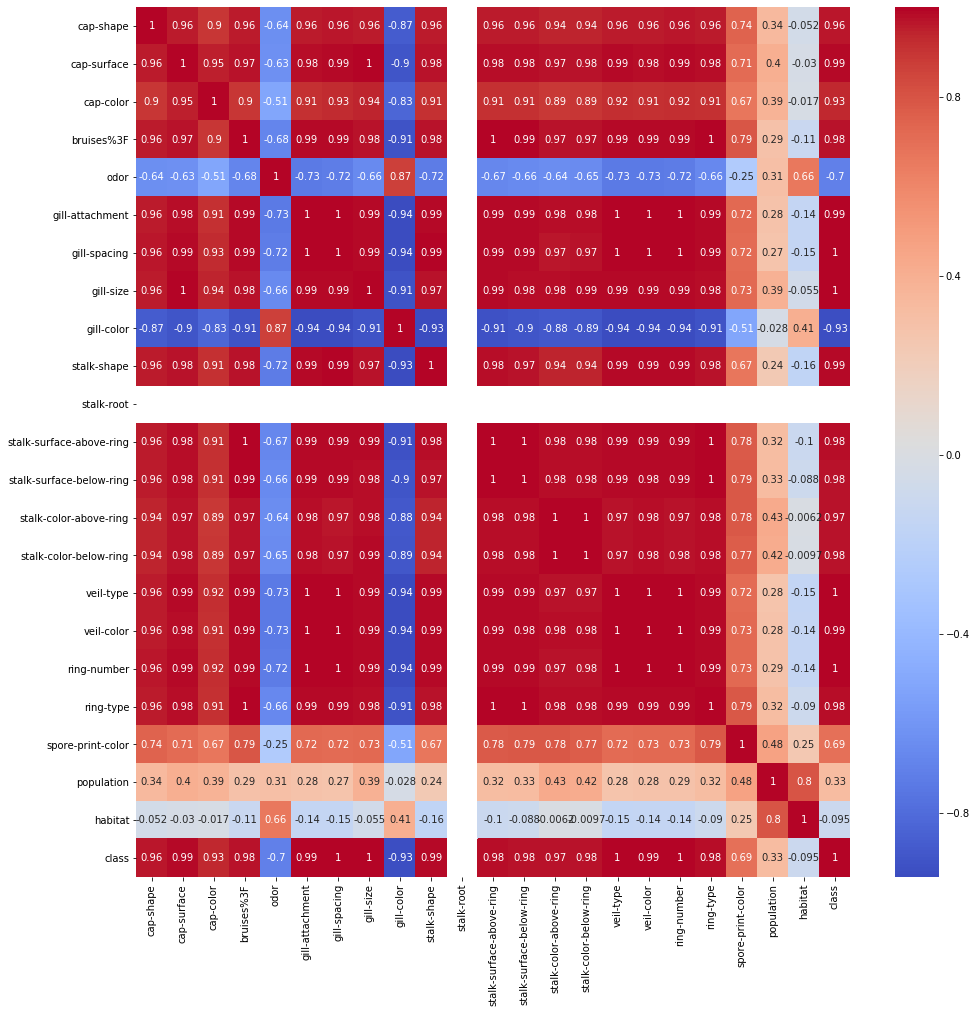

In [6]:
print(dfCorr.shape)
plt.figure(figsize=(16,16))

dfCorr[np.abs(dfCorr)<.2] = 0

x_axis_labels = df.columns
y_axis_labels = df.columns

#sns.heatmap(dfCorr.corr(), vmin=-1);
sns.heatmap(dfCorr.corr(),
            #vmin=-1,
            cmap='coolwarm',
            annot=True,
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels);


# Fix the top and the bottom of the heatmap
bottom_y, top_y = plt.ylim() 
bottom_y += 0.5 
top_y -= 0.5 
plt.ylim(bottom_y, top_y)

plt.show() 